In [1]:
import seaborn as sns
from pollinator_model import PollinatorModel

processing
returned to hive
agents added
returned to hive
agents added
agents added
returned to hive
death by poison
agents added
agents added
agents added
agents added
returned to hive
returned to hive
agents added
agents added
agents added
agents added
agents added
returned to hive
returned to hive
agents added
agents added
agents added
agents added
agents added
agents added
returned to hive
agents added
returned to hive
returned to hive
returned to hive
agents added
agents added
agents added
agents added
agents added
agents added
agents added
returned to hive
agents added
agents added
returned to hive
agents added
returned to hive
agents added
returned to hive
agents added
returned to hive
agents added
agents added
agents added
agents added
death by energy
death by energy
death by energy
death by energy
death by energy
death by energy
death by energy
death by energy
death by energy
death by energy
death by energy
death by energy
death by energy
death by energy
death by energy
death 

/Users/billchu/Desktop/MDM2/.venv/lib/python3.13/site-packages/numpy/_core/fromnumeric.py:3860: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/Users/billchu/Desktop/MDM2/.venv/lib/python3.13/site-packages/numpy/_core/_methods.py:145: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)


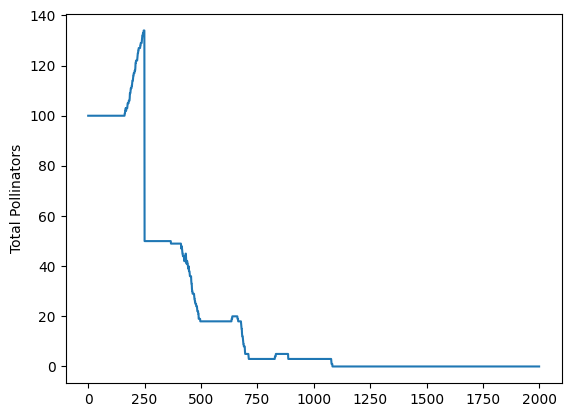

In [ ]:
print('processing')
model = PollinatorModel(bee_type='bumblebee', width=500, height=500, pesticide_ratio=0.7)
for _ in range(2000):
    model.step()
data = model.datacollector.get_model_vars_dataframe()
print(data)
g = sns.lineplot(data=data['Total Pollinators'])